In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.share import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on
re,Support for regular expressions (RE)
time,This module provides various functions to manipulate time values
inspect,Get useful information from live Python objects
datetime,"datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])"


In [2]:
# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'helvetica,arial'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 20)

In [4]:
sem_df = read_summary_eval_df()  # "sem_df" stands for "summary evaluation metrics" (dataframe)
sem_df = sem_df[sem_df.file_relative_path.str.endswith('allset_test.hdf')]
display(sem_df)

,clf,feats,n_estimators,max_samples,random_state,roc_auc_score,average_precision_score,log_loss,behaviour,best_th_pr_curve,best_th_roc_curve,contamination,file_relative_path,tr_set
0,IsolationForest,psd@0.2sec,50,1024,11,0.837592,0.889191,0.532613,new,0.545314,0.545314,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=11/allset_test.hdf,allset_train.hdf
1,IsolationForest,psd@0.2sec,100,1024,11,0.838669,0.888227,0.532629,new,0.561714,0.561714,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/allset_test.hdf,allset_train.hdf
2,IsolationForest,psd@0.2sec,100,16384,11,0.823751,0.882817,0.507172,new,0.581444,0.521367,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=100&random_state=11/allset_test.hdf,allset_train.hdf
3,IsolationForest,psd@0.2sec,200,1024,11,0.824593,0.883358,0.531331,new,0.569378,0.561057,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=11/allset_test.hdf,allset_train.hdf
4,IsolationForest,psd@0.2sec,50,1024,42,0.808376,0.876038,0.534185,new,0.581245,0.567641,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=42/allset_test.hdf,allset_train.hdf
5,IsolationForest,psd@0.2sec,100,1024,42,0.807768,0.877354,0.530856,new,0.566649,0.566649,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=42/allset_test.hdf,allset_train.hdf
6,IsolationForest,psd@0.2sec,200,1024,42,0.816471,0.879792,0.533697,new,0.565164,0.562555,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=42/allset_test.hdf,allset_train.hdf
7,IsolationForest,psd@0.2sec,100,16384,42,0.825540,0.883054,0.501565,new,0.528595,0.528595,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=100&random_state=42/allset_test.hdf,allset_train.hdf
8,IsolationForest,psd@0.2sec,50,16384,11,0.827835,0.885300,0.503003,new,0.525335,0.523122,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=50&random_state=11/allset_test.hdf,allset_train.hdf
9,IsolationForest,psd@0.2sec,50,16384,42,0.824048,0.881653,0.507007,new,0.590789,0.534032,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=50&random_state=42/allset_test.hdf,allset_train.hdf


Evaluation metrics (all classifiers) by number of features

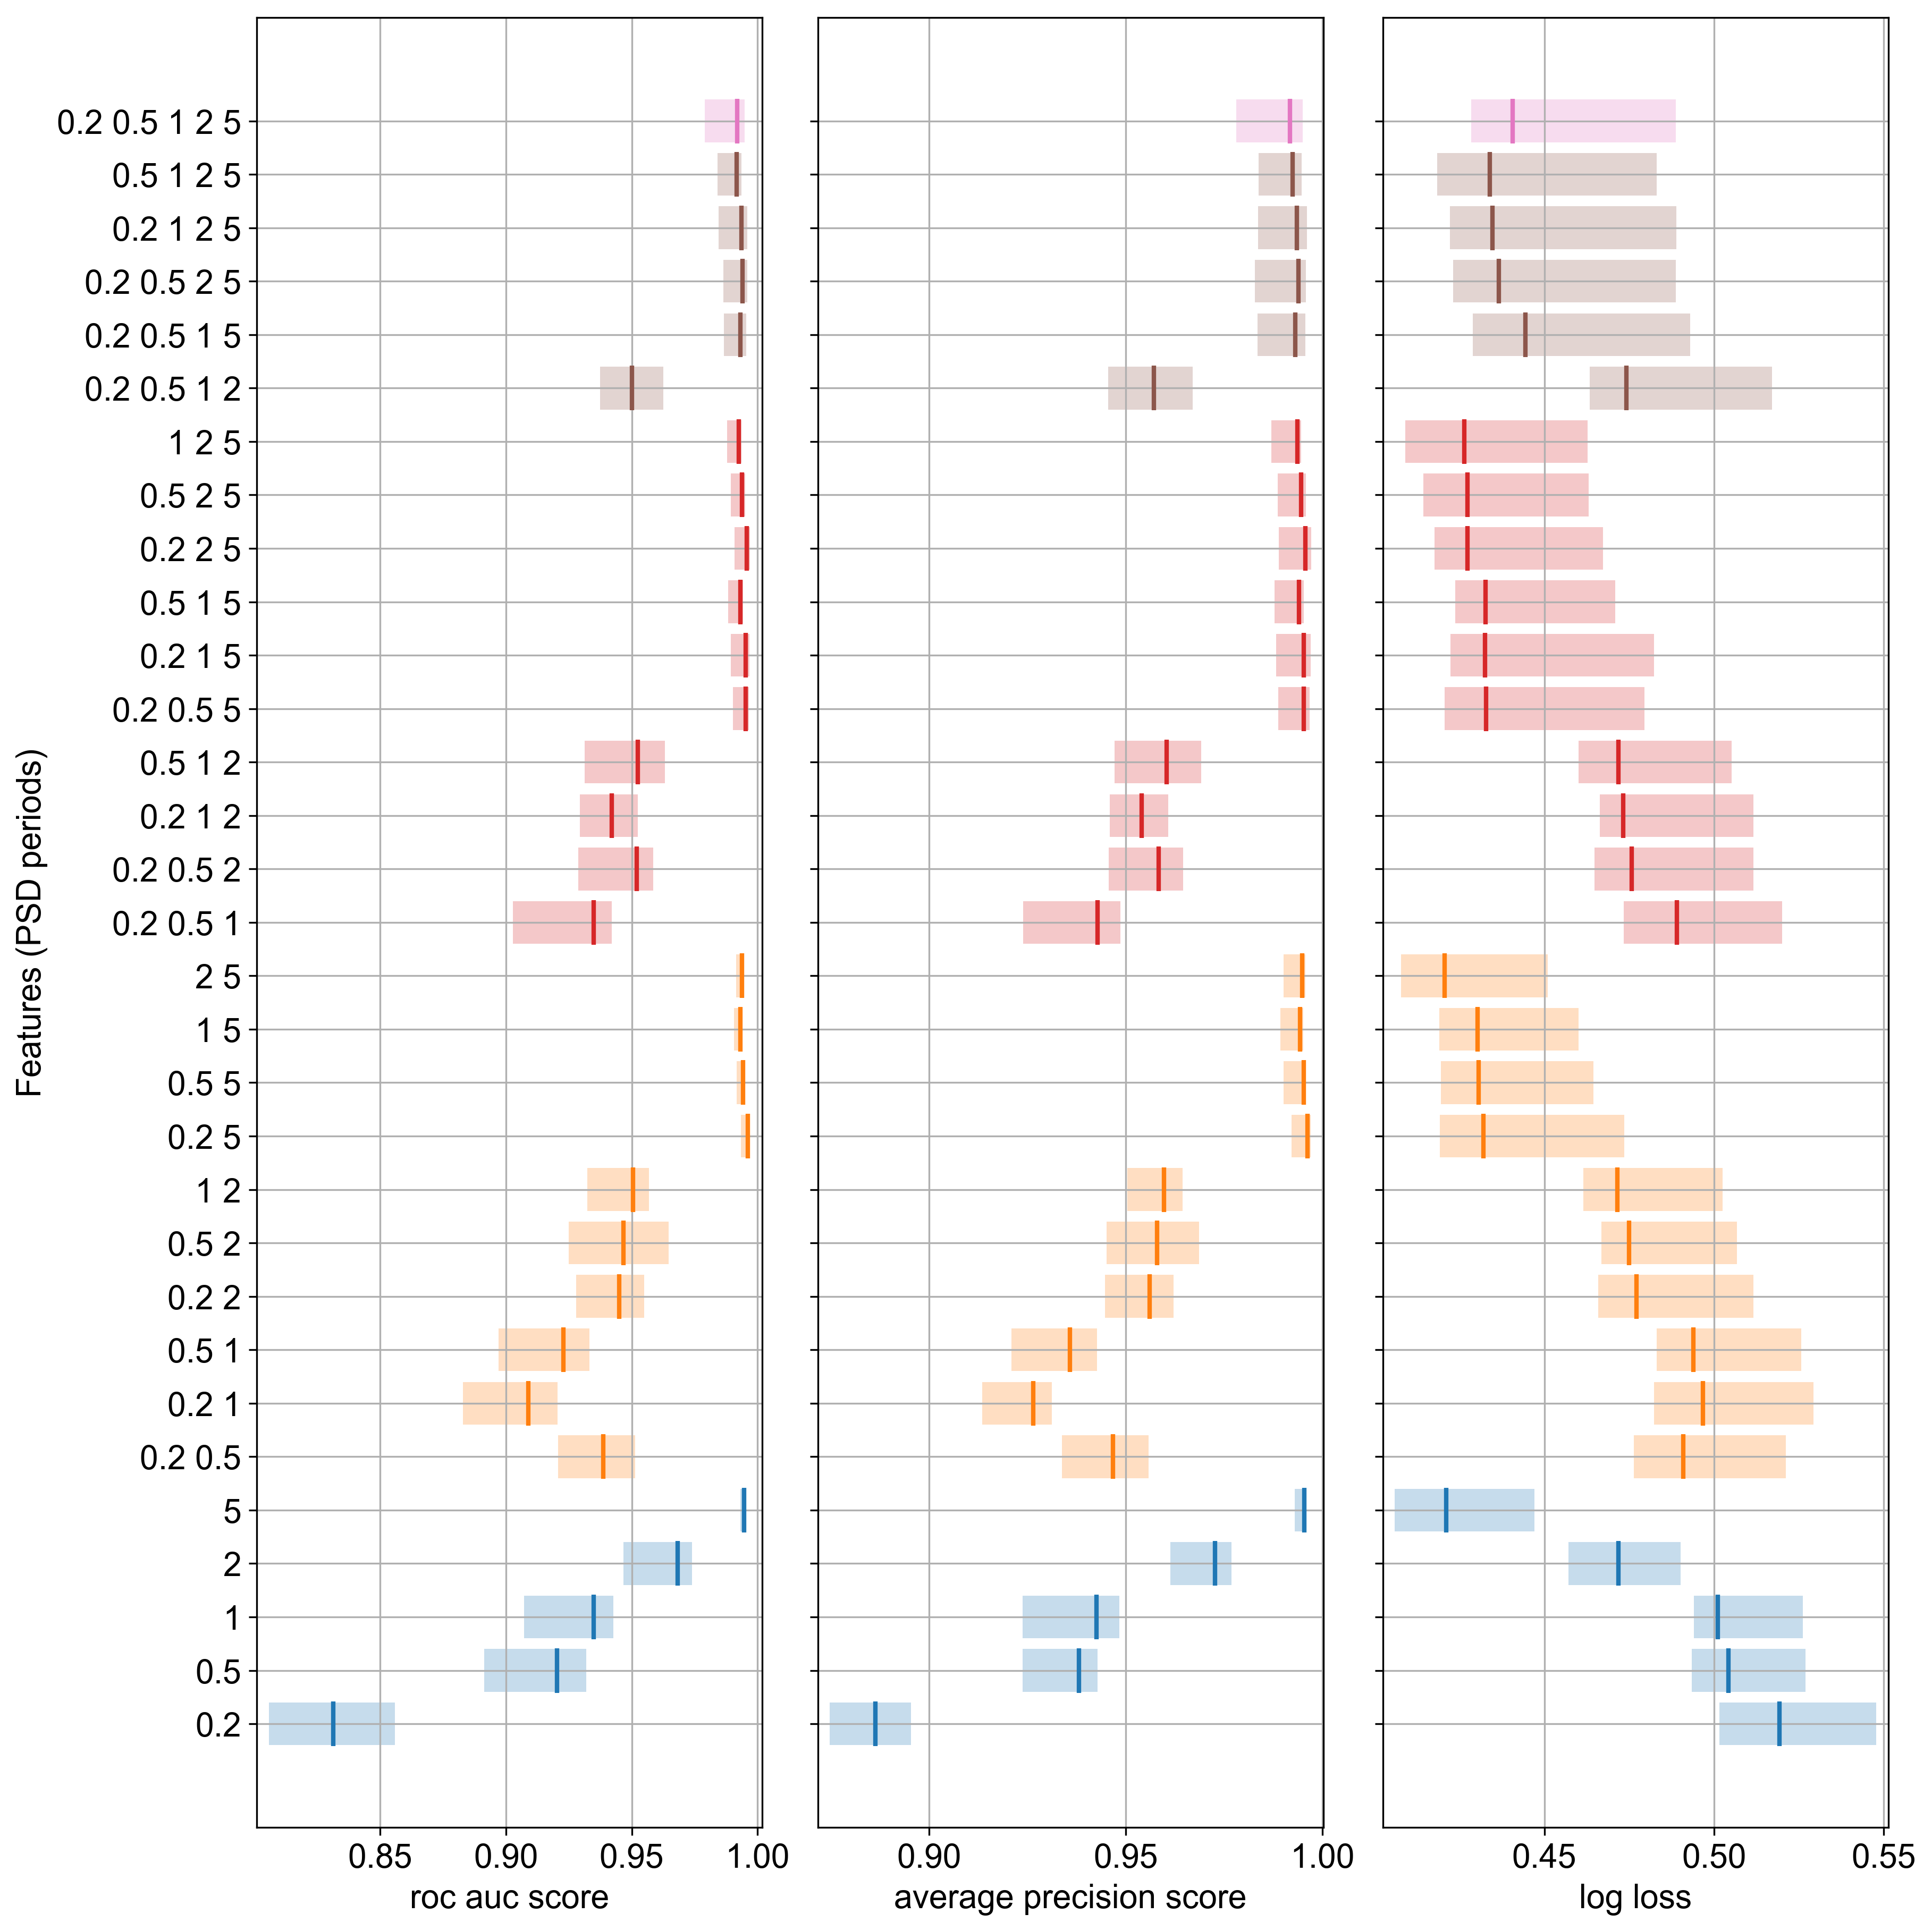

In [5]:
printhtml('<h3>Evaluation metrics (all classifiers) by number of features</h3>')
with use_tmp_colormap('tab10'):
    plot_feats_vs_evalmetrics(sem_df)

In [6]:
SCORE = 'roc_auc_score'
dfmin, dfmedian, dfmax = \
    get_hyperparam_dfs(
        sem_df[sem_df.feats.str.contains('psd@5sec')], SCORE, n_estimators=[50, 100, 200],
                 max_samples=[512, 1024, 2048, 4096, 8192, 16384])
decimals = 4
printhtml('<h3>Min %s per hyperparameter (rounded to %d decimals)</h3>' % (SCORE, decimals))
display(dfmin.round(4))
printhtml('<h3>Median %s per hyperparameter (rounded to %d decimals)</h3>' % (SCORE, decimals))
display(dfmedian.round(4))
printhtml('<h3>Max %s per hyperparameter (rounded to %d decimals)</h3>' % (SCORE, decimals))
display(dfmax.round(4))

Min roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9789  0.9868  0.9878  0.9896  0.9920  0.9927
             100      0.9803  0.9839  0.9881  0.9908  0.9921  0.9927
             200      0.9826  0.9879  0.9886  0.9915  0.9922  0.9924

Median roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9908  0.9928  0.9936  0.9939  0.9943  0.9946
             100      0.9909  0.9930  0.9940  0.9940  0.9941  0.9945
             200      0.9914  0.9930  0.9938  0.9942  0.9943  0.9944

Max roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9957  0.9961  0.9962  0.9964  0.9965  0.9970
             100      0.9954  0.9962  0.9964  0.9964  0.9965  0.9970
             200      0.9951  0.9960  0.9964  0.9965  0.9965  0.9965

roc_auc_score vs "max_samples" for diffetent "n_estimators" values

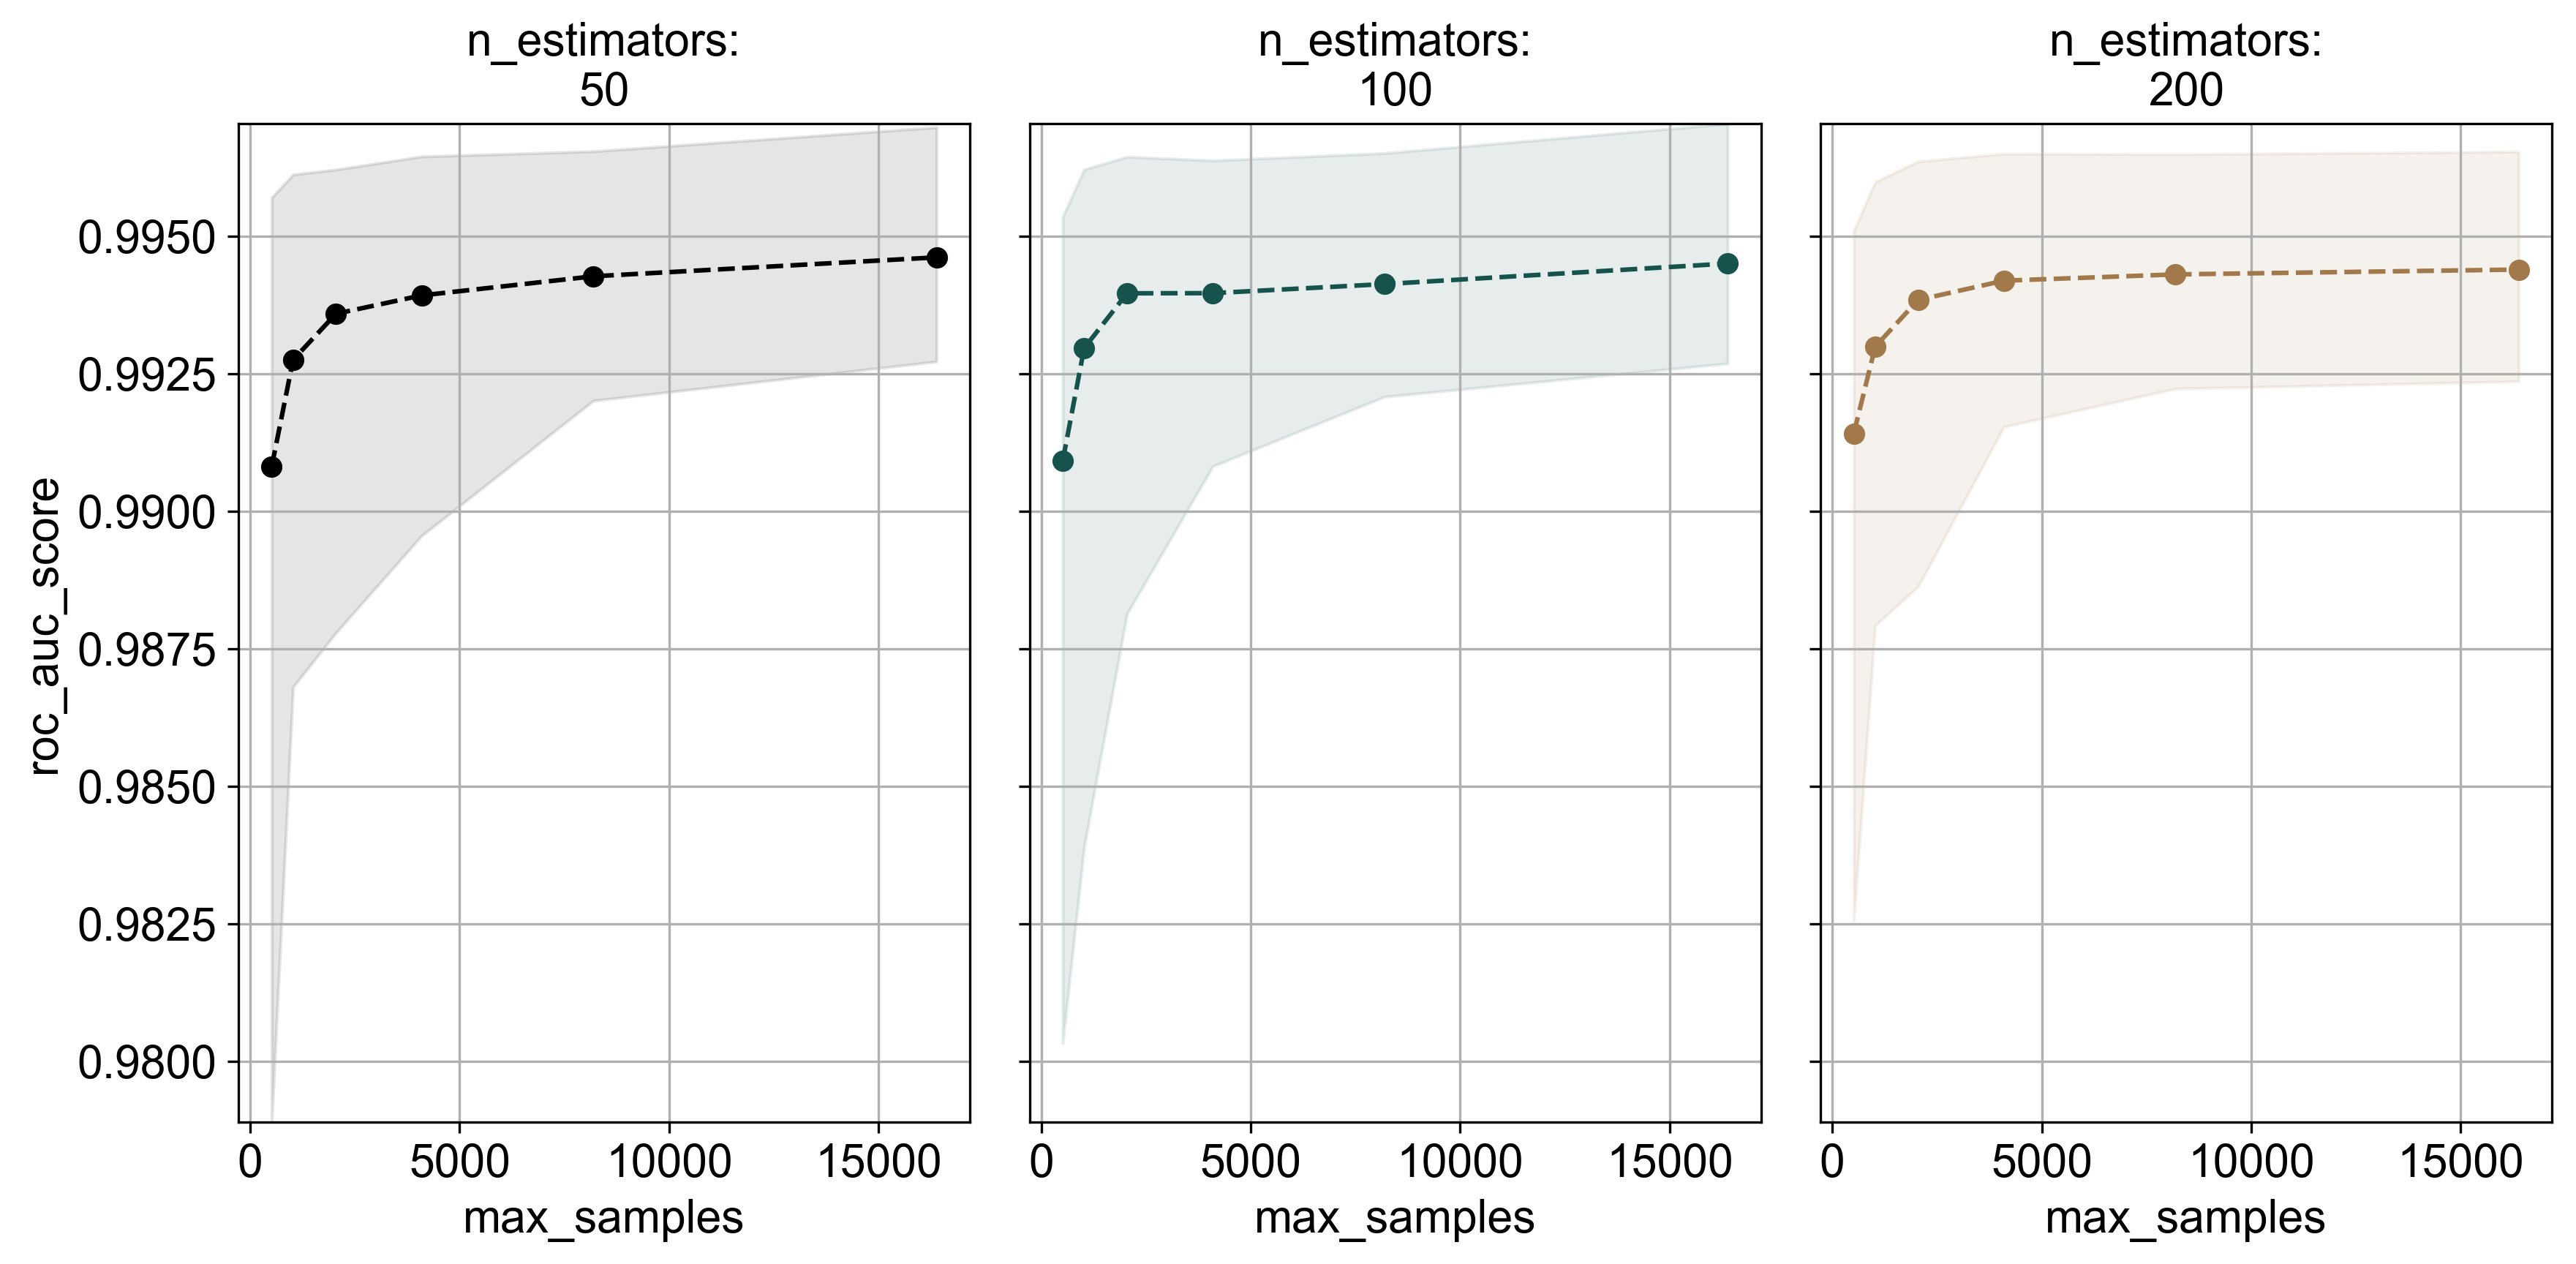

roc_auc_score vs "n_estimators" for different "max_samples" values

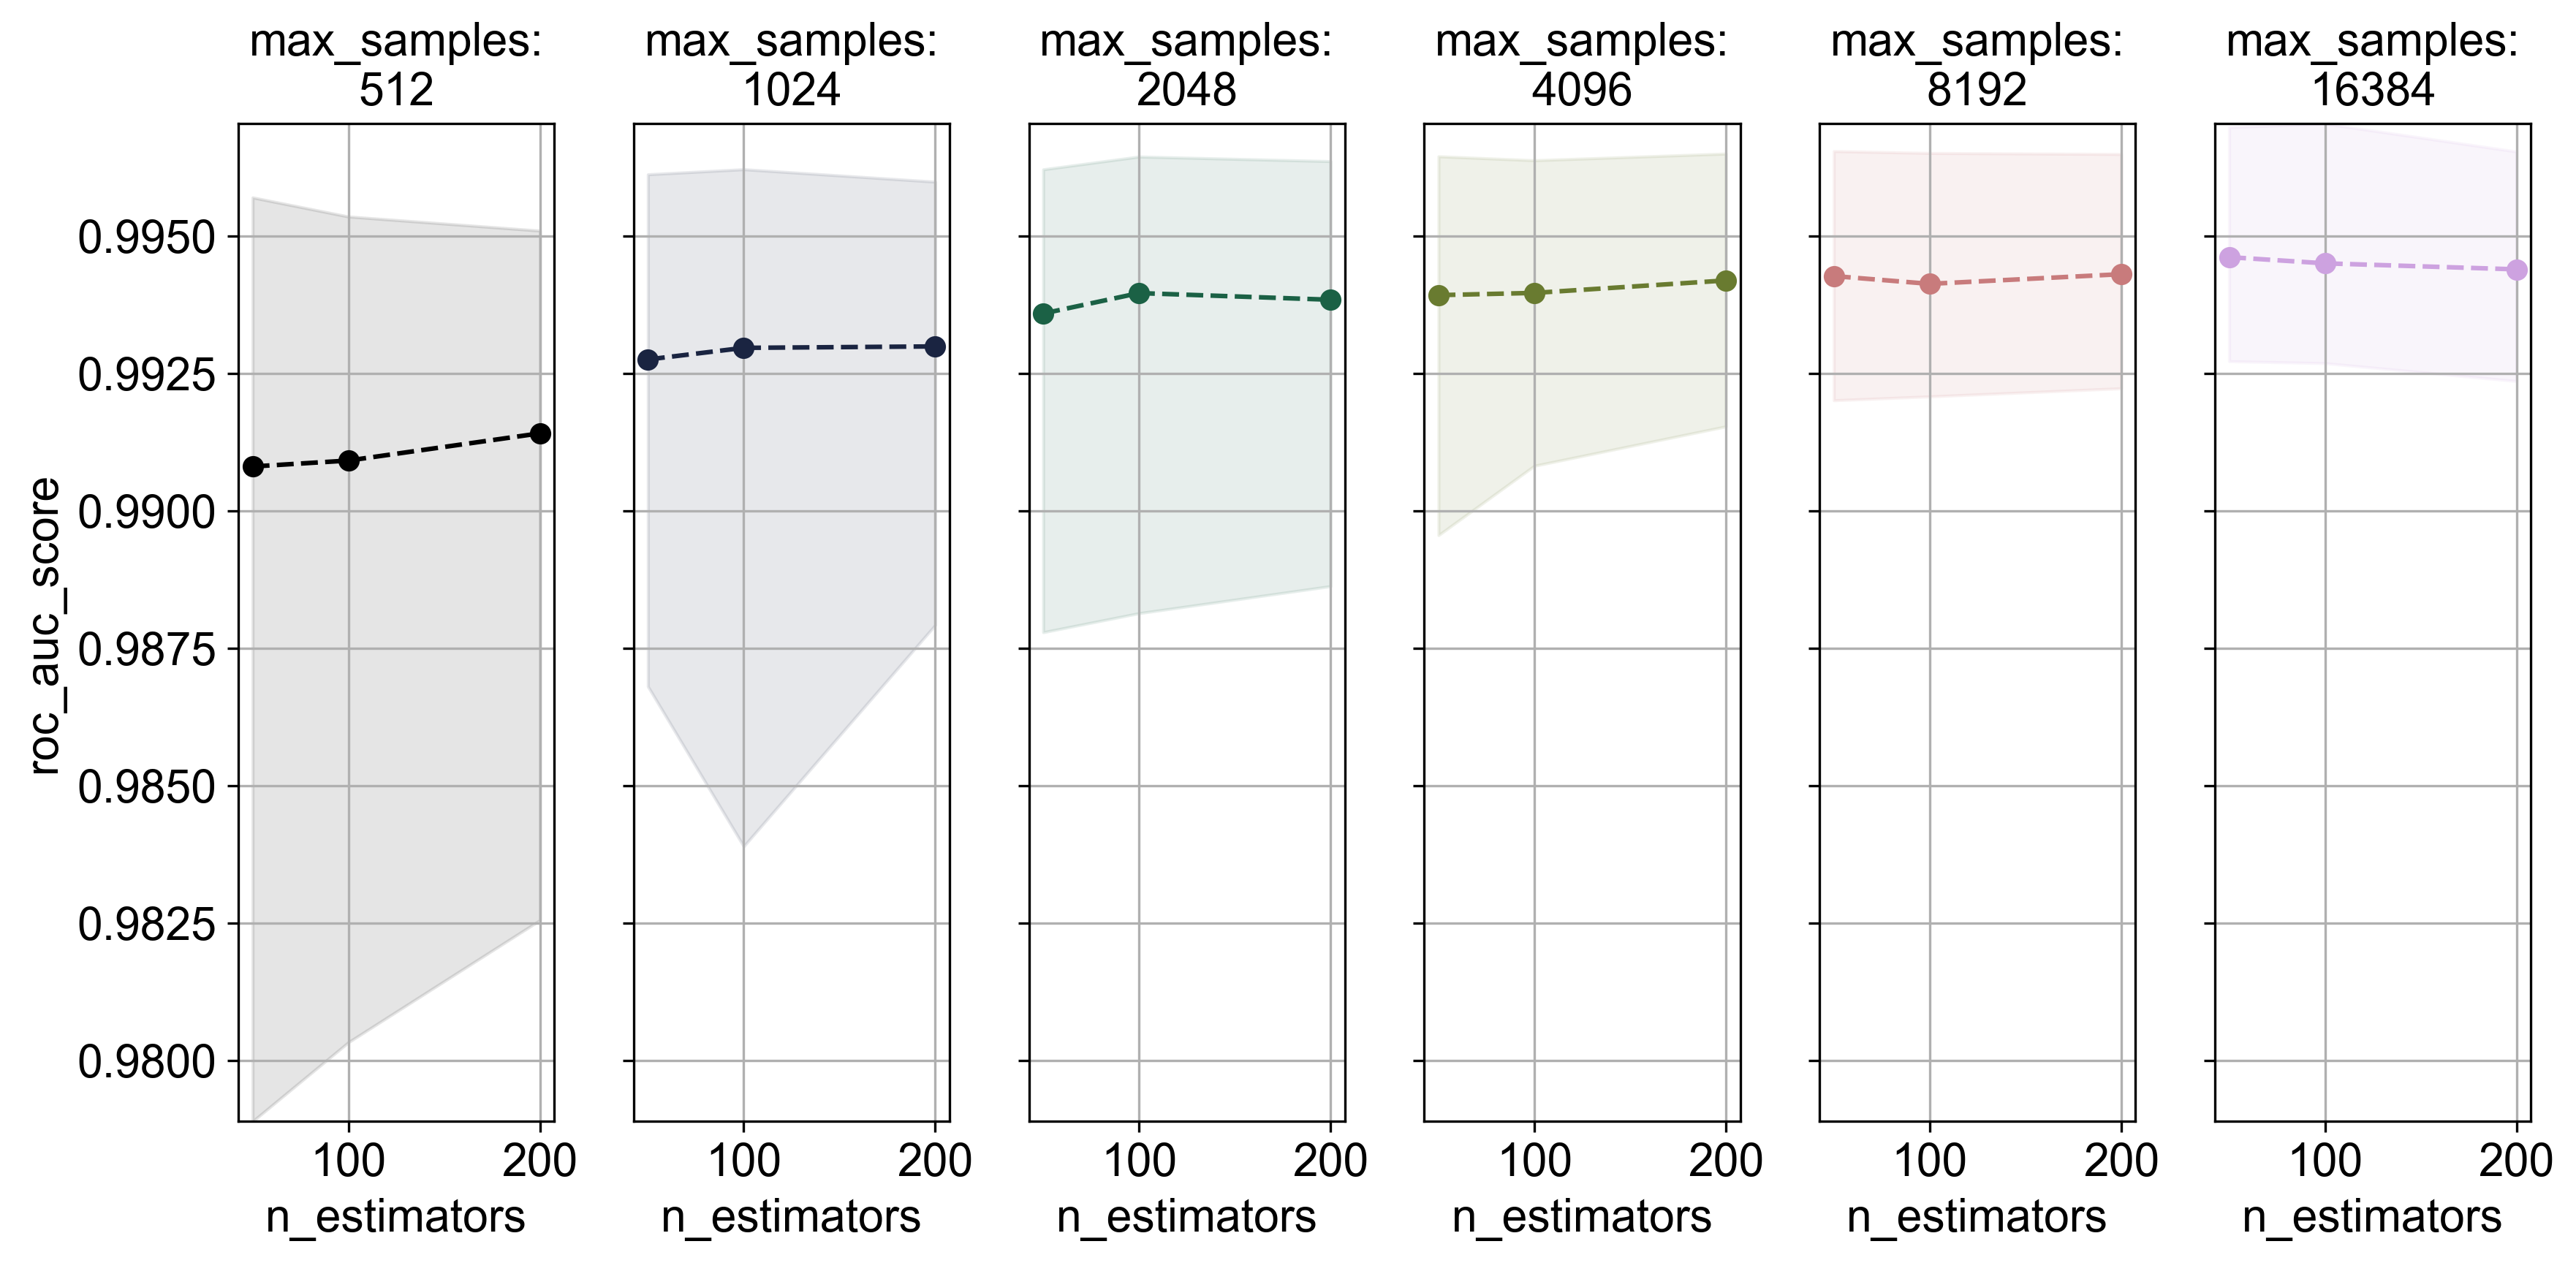

In [7]:
plt.rcParams['figure.figsize'] = (12, 6)
printhtml('<h3>%s vs "max_samples" for diffetent "n_estimators" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin, dfmedian, dfmax, ylabel='roc_auc_score')
printhtml('<h3>%s vs "n_estimators" for different "max_samples" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin.T, dfmedian.T, dfmax.T, ylabel='roc_auc_score')